In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

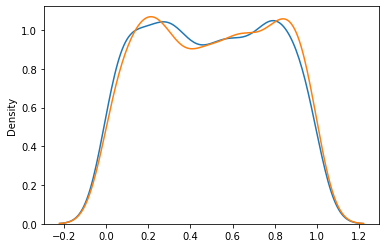

In [2]:
np.random.seed(10)

# Inputs
samples = 1000
# Random samples (Uniformly distributed)
 
u1 = np.random.rand(samples)
u2 = np.random.rand(samples)

sns.kdeplot(u1)
sns.kdeplot(u2)

In [3]:
np.random.seed(10)

# Random samples (normally distributed uncorrelated) 
s1 = np.random.randn(samples)
s2 = np.random.randn(samples)

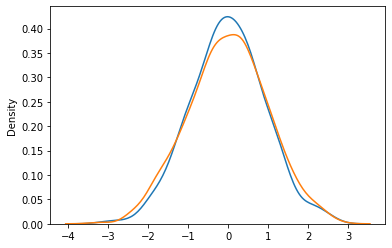

In [4]:
sns.kdeplot(s1)
sns.kdeplot(s2)

In [5]:
# create a dataframe 
d = dict(zip(s1,s2))
df = pd.DataFrame(d.items(),columns=["x","y"])


In [6]:
df.shape

(1000, 2)

In [7]:
df.corr()

,x,y
x,1.000000,0.067743
y,0.067743,1.000000


- Basically when ρ is close to -1 or 1, it means that X and Y are almost linearly related to one another, and so we could in theory predict changes in X by changes in Y quite easily. 
-  When ρ is close to zero, it means that x and y are weakly correlated (or entirely uncorrelated) and so no meaningful relation between the two can be established.
- if we increased the number of samples, the correlation would decrease and eventually converge to zero for sufficiently large N(number of sample)

Transformation (how to generate correlated random variables)
- let's take these uncorrelated normal random variables x and y, and compute two correlated variables x_new and y_new with coefficient ρ (defined by us). 
$$x_{new} = \mu_{x} + \sigma_{x}x$$
$$y_{new} = \mu_{y} + \sigma_{y}(ρx+\sqrt{1-ρ^2-y}$$

In [10]:
# Correlated random samples

mu_x = 1
mu_y = 2
sigma_x = 0.85
sigma_y = 1.24
rho = 0.5
x_new = mu_x + sigma_x * df.x
y_new = mu_y + sigma_y * (rho*df.x + np.sqrt(1-rho**2)*df.y)


In [11]:
d_new = dict(zip(x_new,y_new))
df_new = pd.DataFrame(d_new.items(),columns=["x","y"])

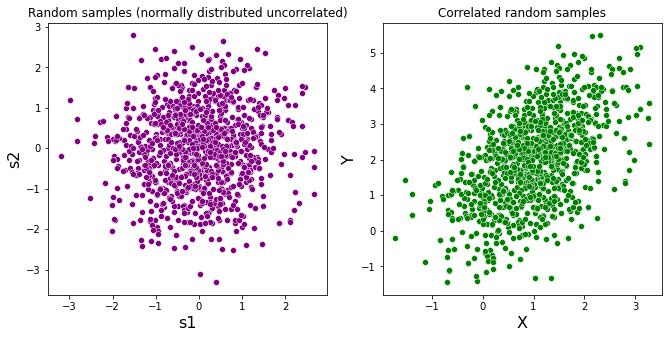

In [35]:
# Generate plots
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.scatterplot(s1,s2,color="purple")
plt.title("Random samples (normally distributed uncorrelated)")
plt.xlabel('s1', fontsize=16)
plt.ylabel('s2', fontsize=16)

plt.subplot(1,2,2)
sns.scatterplot(df_new.x,df_new.y,color="green")
plt.title("Correlated random samples")
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.show()

As we can see, correlated variables X and Y produce a more elliptical distribution than S1 and S2, and is also tilted by a 45 degree angle. 

*Let's look at how the change in the value of W chnages the fitting line*

---



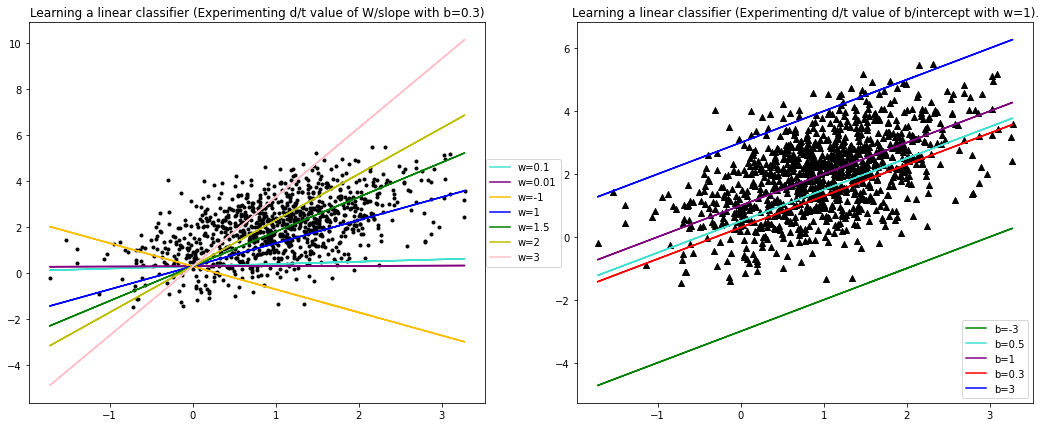

In [76]:
X = df_new.x
Y = df_new.y
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)#add points to plot
plt.scatter(X, Y,marker = ".",color="k")
# add line of best fit to plot
plt.plot(X, 0.1*X+0.3,color="#40E0D0",label="w=0.1") 
plt.plot(X, 0.01*X+0.3,color="#800080",label="w=0.01") 
plt.plot(X, -1*X+0.3,color="#FFBF00",label="w=-1") 
plt.plot(X, 1*X+0.3,color="blue",label="w=1" ) 
plt.plot(X, 1.5*X+0.3,color="green",label="w=1.5" )  
plt.plot(X, 2*X+0.3,color="y",label="w=2" )  
plt.plot(X, 3*X+0.3,color="pink",label="w=3")  
plt.legend(loc='center left', bbox_to_anchor=(0.99, 0.5))
plt.title("Learning a linear classifier (Experimenting d/t value of W/slope with b=0.3)")


plt.subplot(1,2,2)
#add points to plot
plt.scatter(X, Y,marker = "^",color="k")
#add line of best fit to plot
plt.plot(X, 1*X+-3,color="green",label="b=-3" ) 
plt.plot(X, 1*X+0.5,color="#40E0D0",label="b=0.5") 
plt.plot(X, 1*X+1,color="#800080",label="b=1") 

plt.plot(X, 1*X+0.3,color="red",label="b=0.3")   

plt.plot(X, 1*X+3,color="blue",label="b=3" )
plt.legend(loc='lower right')
plt.title("Learning a linear classifier (Experimenting d/t value of b/intercept with w=1).")
plt.show() 



*Let's find one best fit*

---

In [43]:
#find line of best fit
w, b = np.polyfit(X, Y, 1)
print("w = {} and b = {}" .format(w,b))

  


w = 0.8201805074706119 and b = 1.1690317073911802


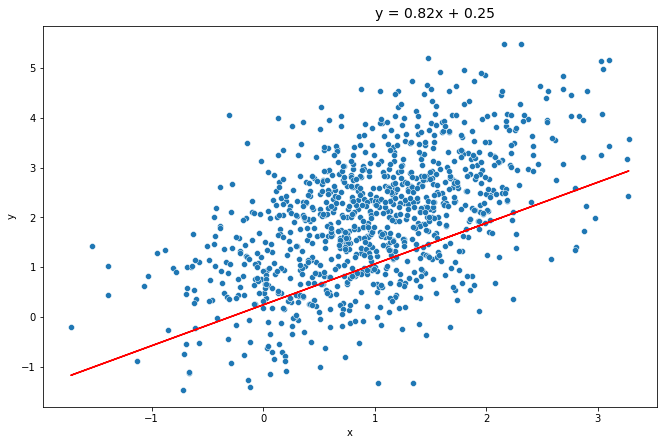

In [120]:


#add points to plot
sns.scatterplot(X, Y)
#add line of best fit to plot
plt.plot(X, w*X+b,color="red")   
plt.text(1, 6, 'y = ' + '{:.2f}'.format(w) + "x" +
         ' + {:.2f}'.format(b) , size=14)
plt.show()  

In [85]:
np.random.seed(10)
# Quadratic curve fitting 
w1= 0.5
w2 =0.2
b = 0.25
x = np.random.randn(1000)
y = w1*x**2+w2*x+b+np.random.randn(1000)*0.3

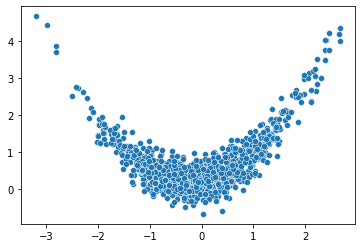

In [104]:

sns.scatterplot(x,y)

plt.show()    
 

In [86]:

#find line of best fit quadratc curve 
w1,w2,b = np.polyfit(x, y, 2)
print("w1 = {} and w2 = {} b={}" .format(w1,w2,b))


w1 = 0.5005328807318283 and w2 = 0.22157087933699512 b=0.24651761739374545


In [87]:
class QuadraticModel:
  def __init__(self):
    self.w1=None
    self.w2=None
    self.b=None
  def fit(self,x,y):
    self.w1,self.w2,self.b = np.polyfit(x, y, 2)
  def predict(self,x):
    return self.w1*x**2+self.w2*x+self.b 

In [88]:
model = QuadraticModel()
model.fit(x,y)

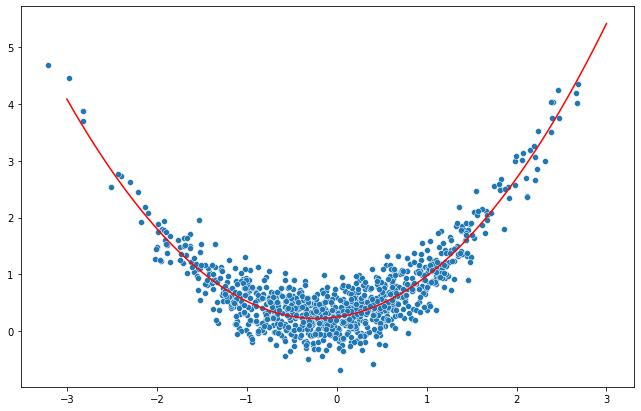

In [121]:
plt.figure(figsize=(11,7))

x_new= np.linspace(-3,3,1000)
y_pred=model.predict(x_new)
#add points to plot
sns.scatterplot(x, y)
#add line of best fit to plot
plt.plot(x_new,y_pred,color="red")   
plt.show()  

In [107]:
y_pred =model.predict(x)

In [108]:
res = pd.DataFrame(dict(y_actual=y,y_pred=y_pred))

In [109]:
res

,y_actual,y_pred
0,1.856854,1.429065
1,0.606168,0.661087
2,1.093225,1.099506
3,0.601011,0.244695
4,0.922433,0.577422
...,...,...
995,0.751547,0.536760
996,0.584477,0.228108
997,1.687614,1.604645
998,0.431765,0.236273


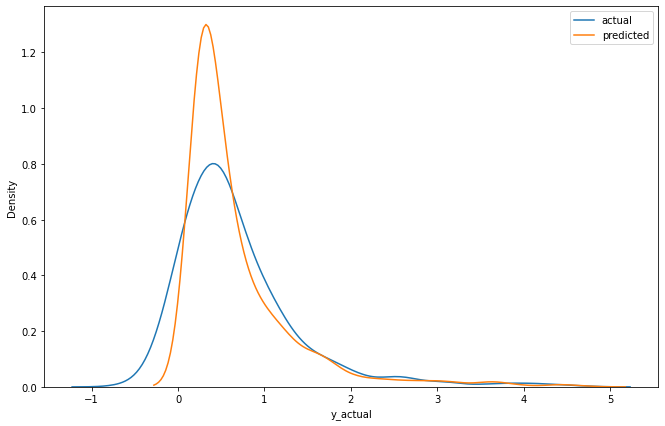

In [122]:
plt.figure(figsize=(11,7))
sns.kdeplot(res.y_actual,label="actual")
sns.kdeplot(res.y_pred,label="predicted")
plt.legend()
plt.show()

In [124]:
res.corr()

,y_actual,y_pred
y_actual,1.000000,0.912806
y_pred,0.912806,1.000000


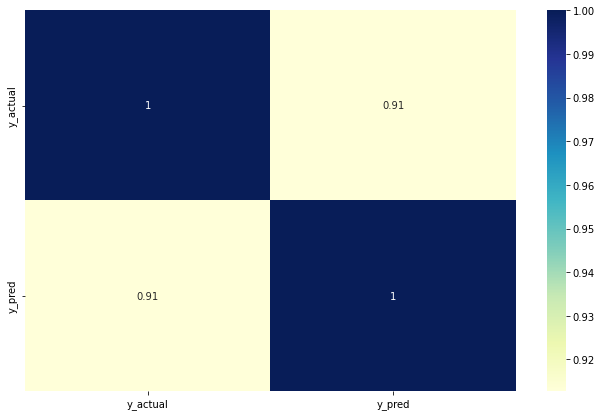

In [128]:
plt.figure(figsize=(11,7))
sns.heatmap(res.corr(), cmap="YlGnBu",annot=True)
plt.show()